In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import numpy as np
import matplotlib.patches as patches
import sys
import pandas as pd
sys.path.append('..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
while os.getcwd().split('/')[-1] != 'imodels-experiments':
    os.chdir('..')

from config.figs_ensembles.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
import viz

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 14 9


In [23]:
# run comparison aggregations
!python3 02_aggregate_results.py

  0%|                                                    | 0/84 [00:00<?, ?it/s]02_aggregate_results.py:53: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
100%|███████████████████████████████████████████| 84/84 [03:49<00:00,  2.73s/it]
successfully processed 70 / 84 individual seeds
100%|███████████████████████████████████████████| 14/14 [03:08<00:00, 13.46s/it]
successfully processed 14 / 14 averaged seeds


# overarching plots

  0%|          | 0/14 [00:00<?, ?it/s]/accounts/projects/vision/chandan/imodels-experiments/viz.py:267: UserWarning: tried Bagging-FIGS-rerun but valid keys are dict_keys(['Bagging-FIGS', 'Boosting-FIGS', 'CART', 'FIGS', 'RandomForest', 'XGBoost'])
  except:
/accounts/projects/vision/chandan/imodels-experiments/viz.py:267: UserWarning: tried  Boosting-FIGS but valid keys are dict_keys(['Bagging-FIGS', 'Boosting-FIGS', 'CART', 'FIGS', 'RandomForest', 'XGBoost'])
  except:
/accounts/projects/vision/chandan/imodels-experiments/viz.py:267: UserWarning: tried Bagging-FIGS-rerun-no-randomization but valid keys are dict_keys(['Bagging-FIGS', 'Boosting-FIGS', 'CART', 'FIGS', 'RandomForest', 'XGBoost'])
  except:
  7%|▋         | 1/14 [00:47<10:12, 47.09s/it]/accounts/projects/vision/chandan/imodels-experiments/viz.py:267: UserWarning: tried  Boosting-FIGS but valid keys are dict_keys(['Bagging-FIGS', 'Bagging-FIGS-rerun', 'Bagging-FIGS-rerun-no-randomization', 'Boosting-FIGS', 'CART', 'FIGS', 

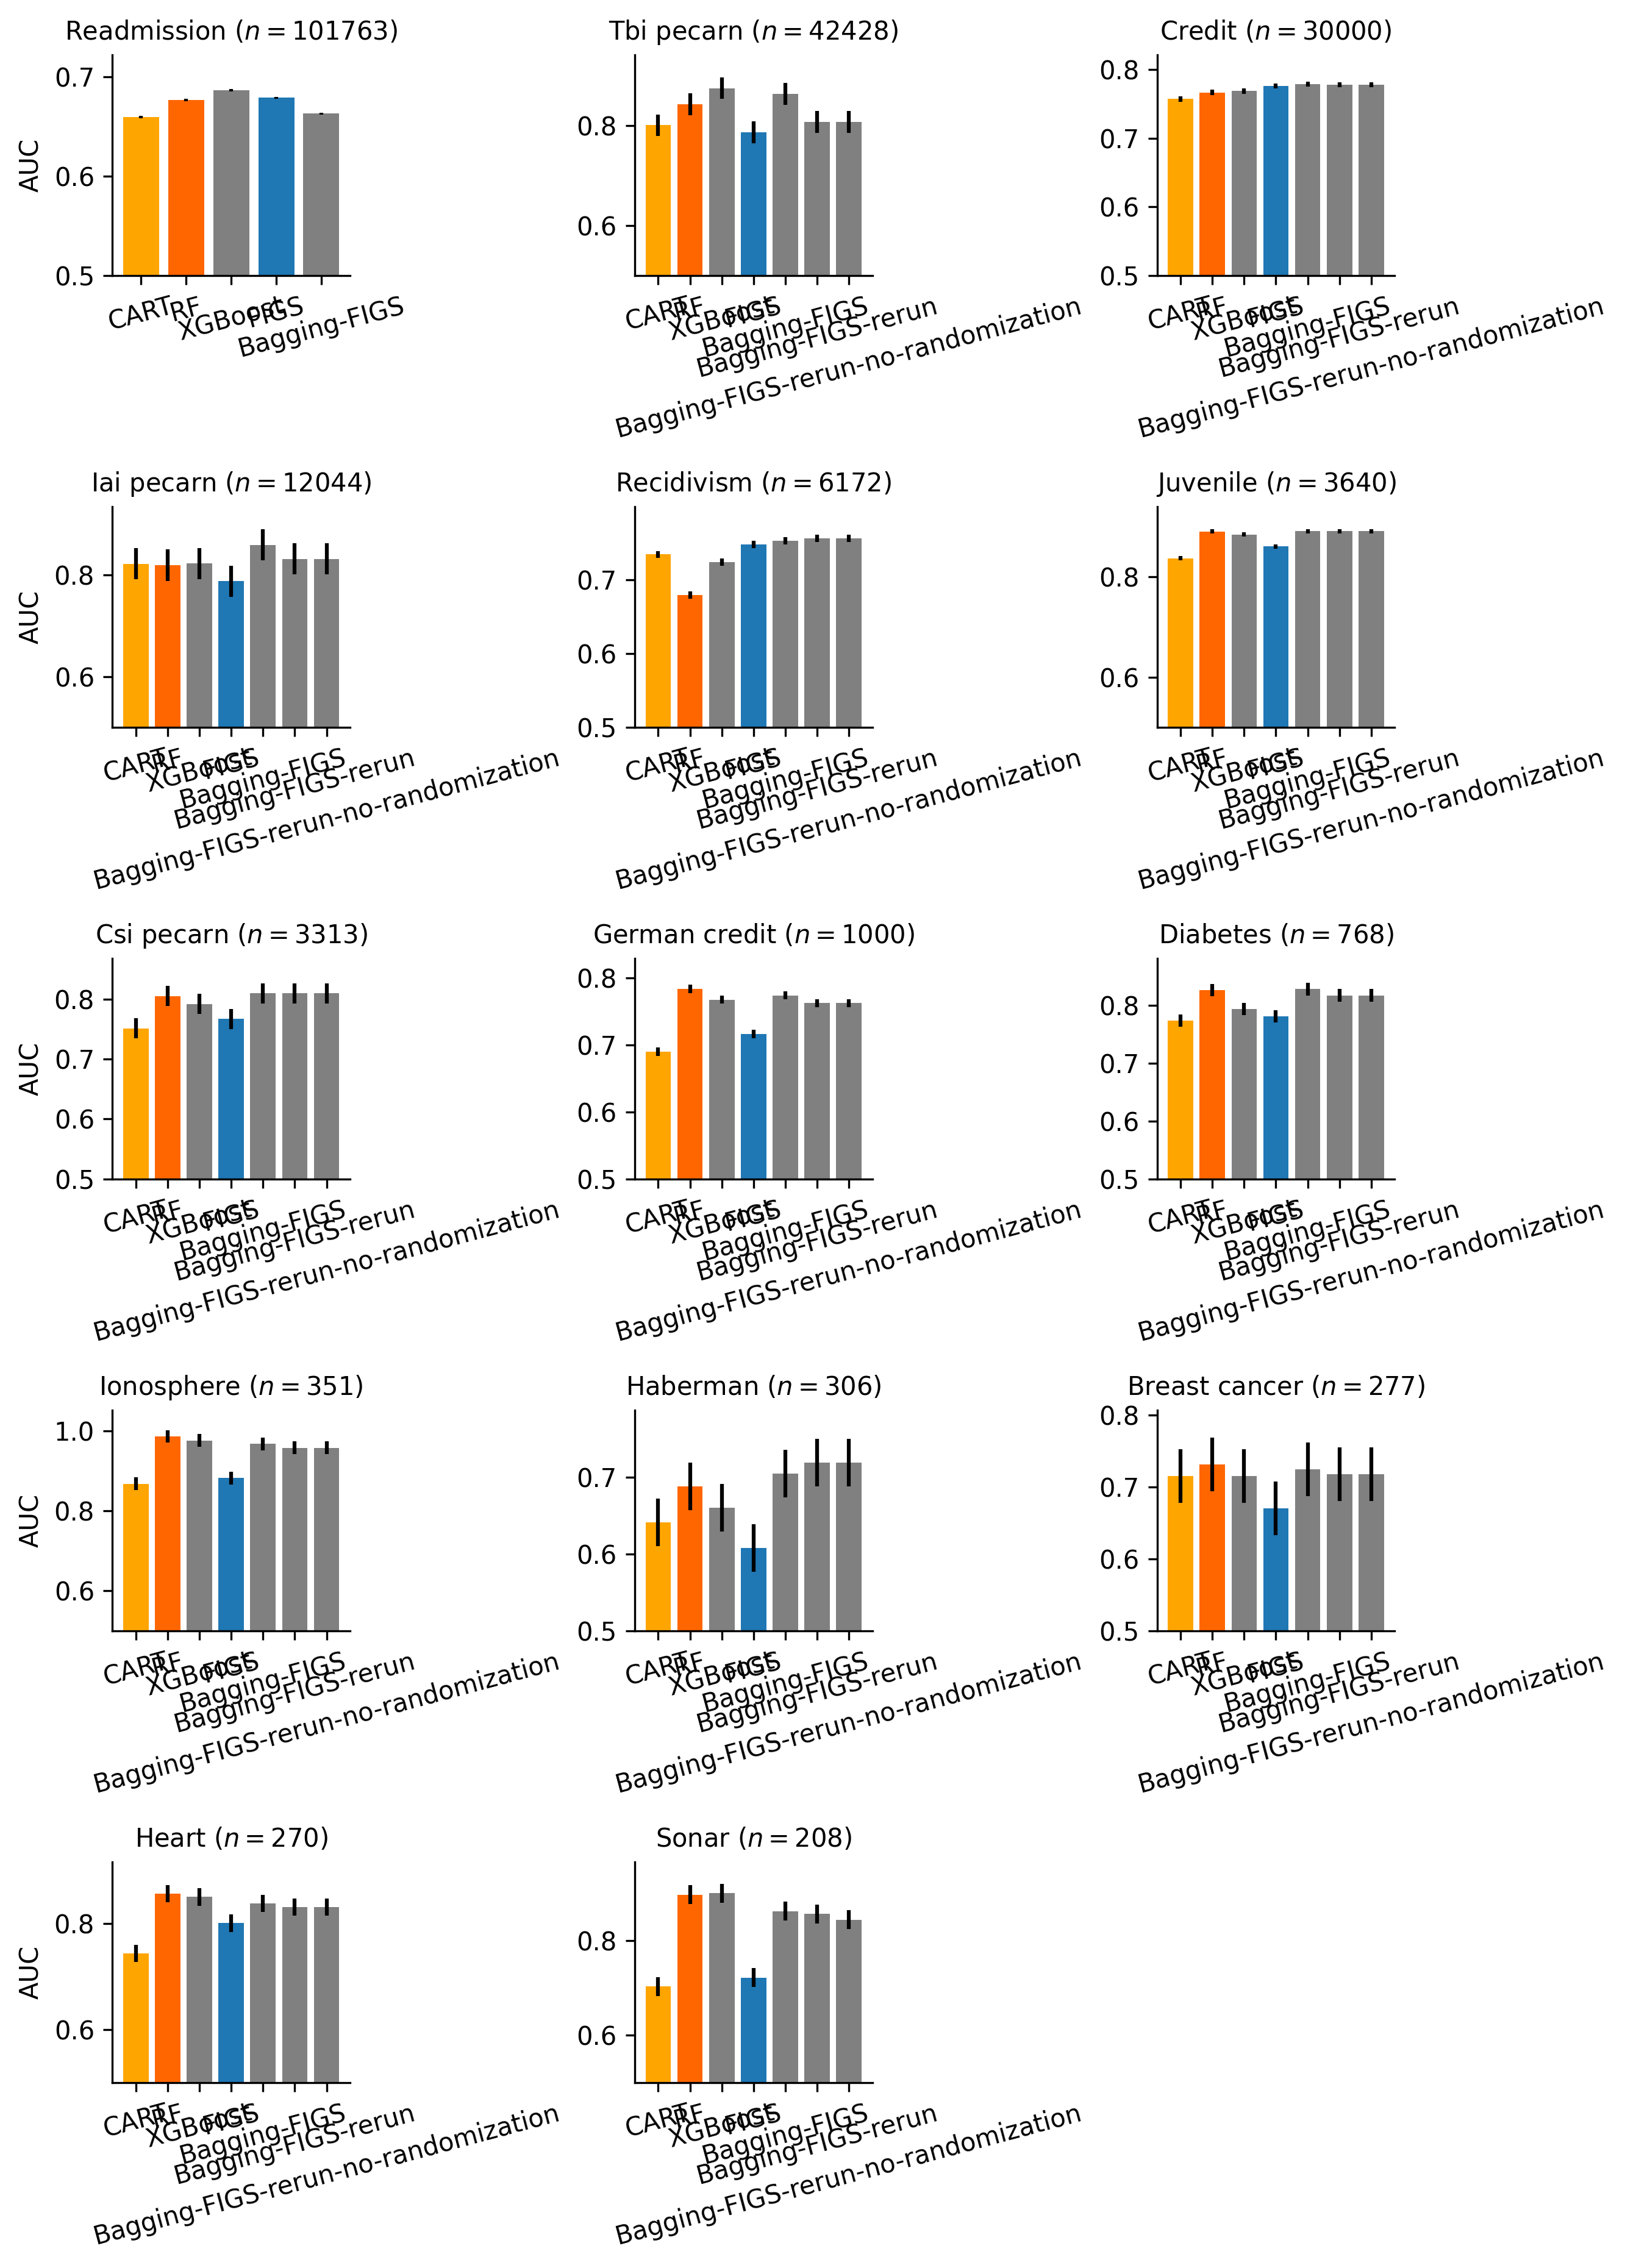

In [25]:
results_all = viz.plot_bests(metric='rocauc',
                     datasets=DATASETS_CLASSIFICATION[::-1],
                models_to_include=['CART', 'RandomForest', 'XGBoost', 'FIGS',
                                   'Bagging-FIGS', 'Bagging-FIGS-rerun', ' Boosting-FIGS', 'Bagging-FIGS-rerun-no-randomization'],
                config_name='figs_ensembles')
plt.show()

In [26]:
r = pd.DataFrame.from_dict(results_all)
# r
dsets = [x.capitalize().replace('-', ' ')
         .replace('Tbi', 'TBI')
         .replace('Iai', 'IAI')         
         .replace('Csi', 'CSI')                  
         for x in r['dset'].unique()]

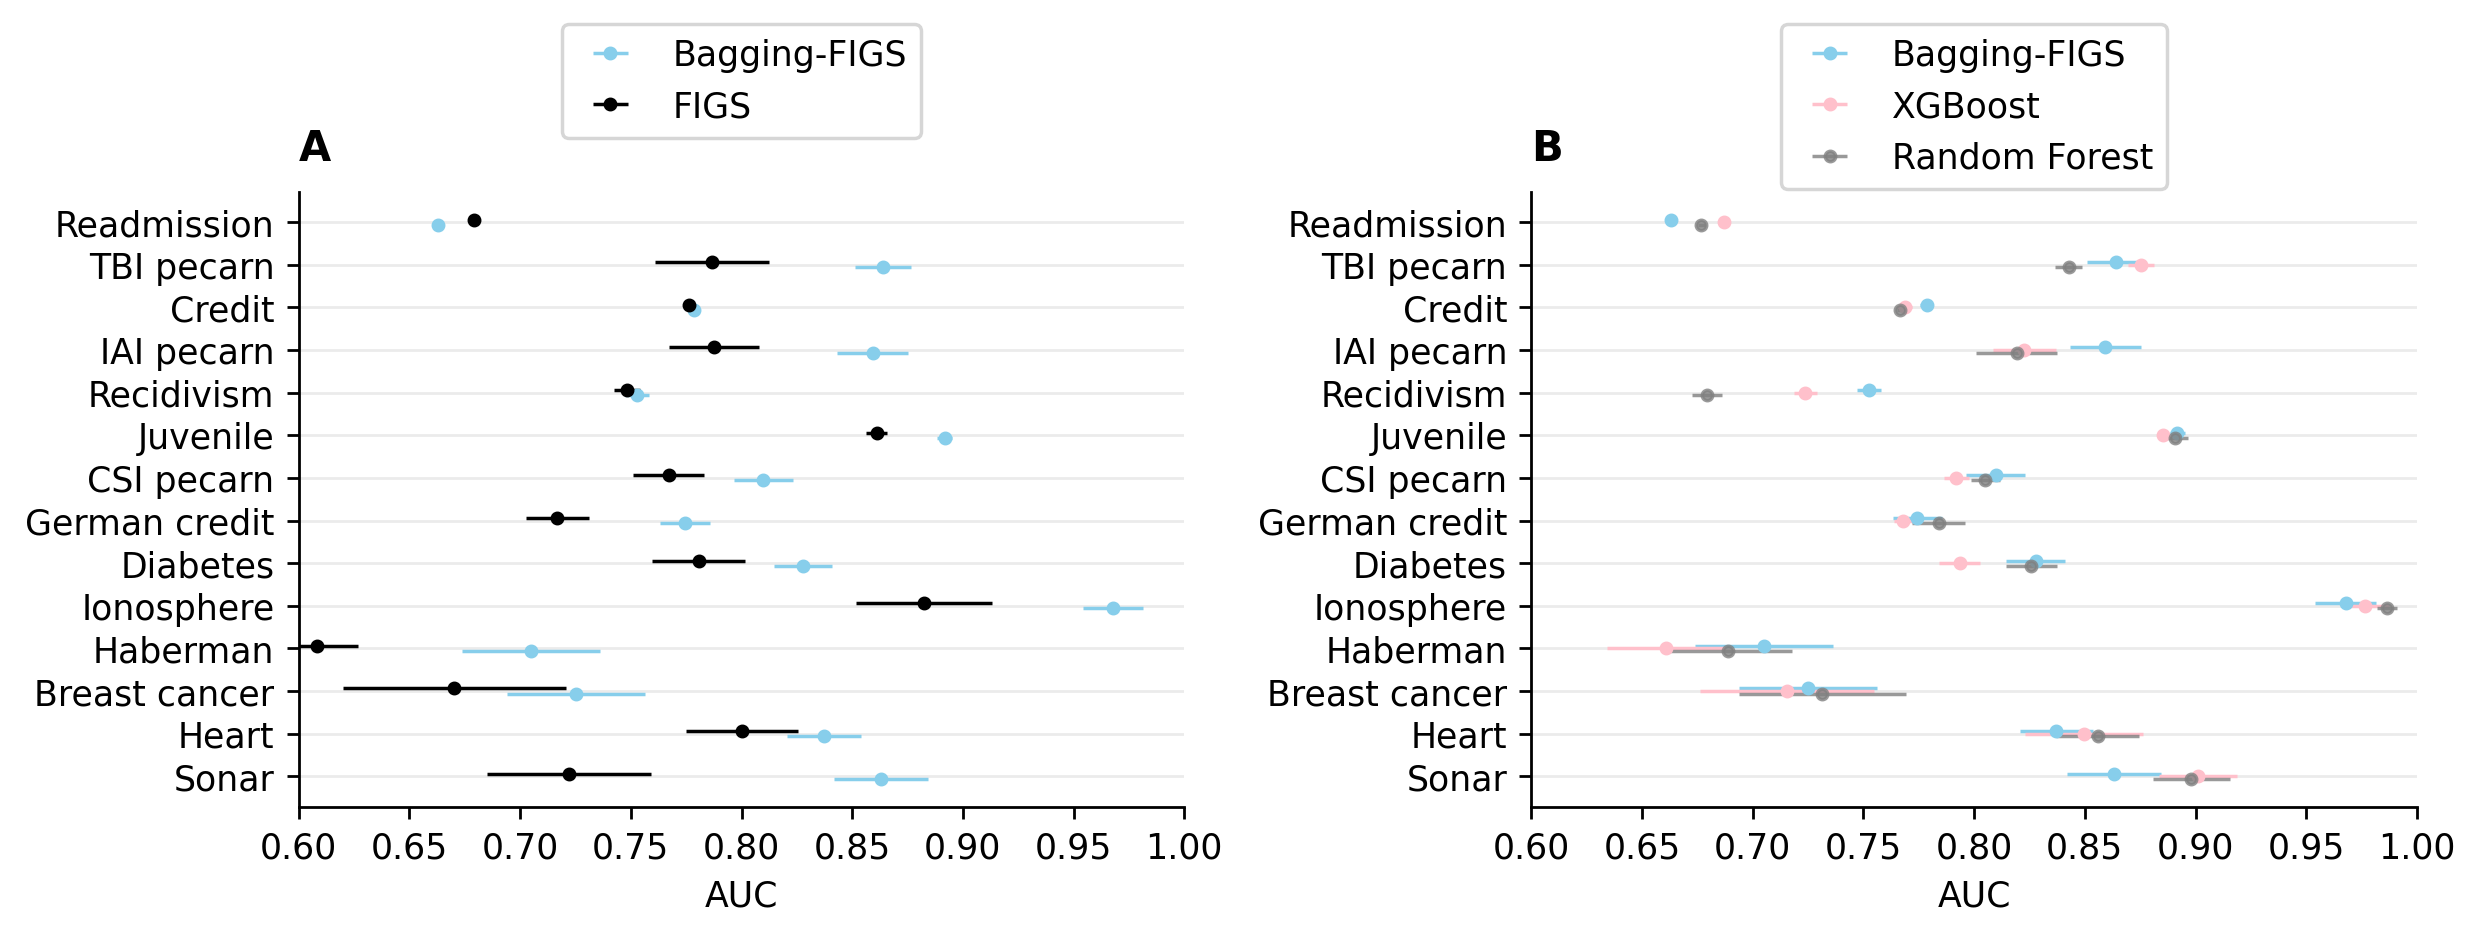

In [29]:
plt.figure(figsize=(10, 4), facecolor='w')
ax = plt.subplot(121)
elinewidth = 1
linedelta = elinewidth/2

y = np.arange(len(dsets))[::-1]
z = r[r['name'] == 'Bagging-FIGS']
plt.errorbar(x=z.rocauc_test, y=y-0.06, fmt='.', xerr=z.rocauc_test_std, color='skyblue', alpha=1, label='Bagging-FIGS', elinewidth=elinewidth)
z = r[r['name'] == 'FIGS']
plt.errorbar(x=z.rocauc_test, y=y+0.06, fmt='.', xerr=z.rocauc_test_std, color='black', alpha=1, label='FIGS', elinewidth=elinewidth)
# z = r[r['name'] == 'Boosting-FIGS']
# plt.errorbar(x=z.rocauc_test, y=y+0.06, fmt='.', xerr=z.rocauc_test_std, color='orange', alpha=1, label='Boosting-FIGS', elinewidth=elinewidth)

plt.yticks(y, labels=dsets)
plt.xlabel('AUC')
plt.xlim((0.6, 1))
plt.legend(bbox_to_anchor=(0.5, 1.3), loc='upper center') #, labelcolor='linecolor')
plt.text(0, 1.05, 'A', transform=ax.transAxes, fontweight='bold', fontsize='large')
plt.grid(axis='y', alpha=0.25)

ax = plt.subplot(122)
y = np.arange(len(dsets))[::-1]
z = r[r['name'] == 'Bagging-FIGS']
plt.errorbar(x=z.rocauc_test, y=y+0.06, fmt='.', xerr=z.rocauc_test_std, color='skyblue', alpha=1, label='Bagging-FIGS', elinewidth=elinewidth)
z = r[r['name'] == 'XGBoost']
plt.errorbar(x=z.rocauc_test, y=y, fmt='.', xerr=z.rocauc_test_std, color='pink', alpha=1, label='XGBoost', elinewidth=elinewidth)
z = r[r['name'] == 'RF']
plt.errorbar(x=z.rocauc_test, y=y-0.06, fmt='.', xerr=z.rocauc_test_std, color='gray', alpha=0.8, label='Random Forest', elinewidth=elinewidth)
plt.xlabel('AUC')
plt.yticks(y, labels=dsets)
plt.legend(bbox_to_anchor=(0.5, 1.3), loc='upper center')
plt.xlim((0.6, 1))
plt.text(0, 1.05, 'B', transform=ax.transAxes, fontweight='bold', fontsize='large')
plt.grid(axis='y', alpha=0.25)
plt.tight_layout(pad=1)
plt.savefig('no_limit_generalization.pdf')
plt.show()

In [34]:
z = r[r['name'] == 'Bagging-FIGS-rerun']
z
z2 = r[r['name'] == 'Bagging-FIGS-rerun']
z

,dset,complexity,rocauc_test,rocauc_test_std,name
10,tbi-pecarn,[0.0],0.807878,0.021814,Bagging-FIGS-rerun
17,credit,[0.0],0.777643,0.003732,Bagging-FIGS-rerun
24,iai-pecarn,[0.0],0.831674,0.030836,Bagging-FIGS-rerun
31,recidivism,[0.0],0.756292,0.004896,Bagging-FIGS-rerun
38,juvenile,[0.0],0.891512,0.004114,Bagging-FIGS-rerun
45,csi-pecarn,[0.0],0.809687,0.016734,Bagging-FIGS-rerun
52,german-credit,[0.0],0.762778,0.006117,Bagging-FIGS-rerun
59,diabetes,[0.0],0.816824,0.010869,Bagging-FIGS-rerun
66,ionosphere,[0.0],0.958163,0.015781,Bagging-FIGS-rerun
73,haberman,[0.0],0.719292,0.031101,Bagging-FIGS-rerun


In [33]:
zbag

,dset,complexity,rocauc_test,rocauc_test_std,name
4,readmission,[0.0],0.663066,0.001130,Bagging-FIGS
9,tbi-pecarn,[0.0],0.863873,0.012741,Bagging-FIGS
16,credit,[0.0],0.778485,0.002860,Bagging-FIGS
23,iai-pecarn,[0.0],0.859240,0.016024,Bagging-FIGS
30,recidivism,[0.0],0.752584,0.005397,Bagging-FIGS
37,juvenile,[0.0],0.891767,0.003340,Bagging-FIGS
44,csi-pecarn,[0.0],0.809773,0.013339,Bagging-FIGS
51,german-credit,[0.0],0.774366,0.011240,Bagging-FIGS
58,diabetes,[0.0],0.827785,0.013316,Bagging-FIGS
65,ionosphere,[0.0],0.967812,0.013710,Bagging-FIGS


In [32]:
zbag = r[r['name'] == 'Bagging-FIGS']
zfigs = r[r['name'] == 'FIGS']
zrf = r[r['name'] == 'RF']
zxg = r[r['name'] == 'XGBoost']
print('bagging-figs improvement over FIGS', np.mean(zbag.rocauc_test.values / zfigs.rocauc_test.values) - 1)
print('bagging-figs improvement over RF', np.mean(zbag.rocauc_test.values / zrf.rocauc_test.values) - 1)
print('bagging-figs improvement over XGBoost', np.mean(zbag.rocauc_test.values / zxg.rocauc_test.values) - 1)

bagging-figs improvement over FIGS 0.07042493235949432
bagging-figs improvement over RF 0.007799929627572366
bagging-figs improvement over XGBoost 0.010398531170444869


**compare figs variants**

In [ ]:
ax = plt.subplot(121)
elinewidth = 1
linedelta = elinewidth/2

y = np.arange(len(dsets))[::-1]
z = r[r['name'] == 'Bagging-FIGS']
plt.errorbar(x=z.rocauc_test, y=y-0.06, fmt='.', xerr=z.rocauc_test_std, color='skyblue', alpha=1, label='Bagging-FIGS', elinewidth=elinewidth)
z = r[r['name'] == 'FIGS']
plt.errorbar(x=z.rocauc_test, y=y+0.06, fmt='.', xerr=z.rocauc_test_std, color='black', alpha=1, label='FIGS', elinewidth=elinewidth)
# z = r[r['name'] == 'Boosting-FIGS']
# plt.errorbar(x=z.rocauc_test, y=y+0.06, fmt='.', xerr=z.rocauc_test_std, color='orange', alpha=1, label='Boosting-FIGS', elinewidth=elinewidth)

plt.yticks(y, labels=dsets)
plt.xlabel('AUC')
plt.xlim((0.6, 1))
plt.legend(bbox_to_anchor=(0.5, 1.3), loc='upper center') #, labelcolor='linecolor')
plt.text(0, 1.05, 'A', transform=ax.transAxes, fontweight='bold', fontsize='large')
plt.grid(axis='y', alpha=0.25)

# more bar plots

In [ ]:
viz.plot_bests(metric='rocauc',
                     datasets=DATASETS_CLASSIFICATION,
                models_to_include=['Linear', 'CART', 'FIGS', 'RandomForest', 'RFFIGS-10', 'RFFIGS-10-sub50'], # FIGS, BaggingFIGS, 'RFFIGS-log2', 'RFFIGS', 'RFFIGS-10-sub75'
                config_name='figs_ensembles')

In [ ]:
viz.plot_bests(metric='r2',
                     datasets=DATASETS_REGRESSION,
                models_to_include=['Linear', 'CART', 'FIGS', 'RandomForest', 'RFFIGS-10', 'RFFIGS-10sub50'], # FIGS, 'BaggingFIGS', 'RFFIGS-log2', 'RFFIGS', 
                config_name='figs_ensembles')